In [2]:
# Define the path to the data folder
from pathlib import Path


# Define the path to the data folder
data_folder = Path("data").resolve()

# Define the path to the current folder
current_folder = Path(".").resolve()


### Run Part 1

In [2]:
import json
# Load the JSON data into a list of dictionaries
json_file_path = data_folder /'credit_report_sample.json'
with open(json_file_path, 'r') as f:
    data = json.load(f)

In [3]:
# Initialize CreditReportAnalizer
from src.feature_engineering import CreditReportAnalyzer
part_one = CreditReportAnalyzer(data)
part_one.get_features(9711360)

{'bad_accounts': 0,
 'good_accounts': 7,
 'acountrating_ratio_good': 1.0,
 'acountrating_ratio_bad': 0.0,
 'change_homenumber': False,
 'change_mobile': False,
 'number_of_employments': 5,
 'employment_sector': 'public',
 'ratio_arreas': 0.22801726182007873,
 'ratio_disnhored': 0.0,
 'ratio_judgementamount': 0.0,
 'open_status_loans': 3,
 'remaining_to_original_outstanding_amount_ratio_mean_open_loans': 3.678731476793523,
 'seasoning_mean_open_loans': Timedelta('1213 days 08:00:00'),
 'overdue_ratio_mean_open_loans': 0.09041628965328628,
 'age': 31.0}

### Run part 2

In [3]:
import pandas as pd
# Read data 
data_file_path = data_folder / 'credit.csv'
df = pd.read_csv(data_file_path)
df = df.rename(columns={'Unnamed: 0':'observation_id'})

In [4]:
from src.preprocessing.process_transform import Preprocess

preprocess = Preprocess()

In [5]:
#Preprocess data 
df_engineered, df_non_personal, df_original = preprocess.preprocess_data(df, drop_features=True)

#### Modeling for feature engineered dataset 

In [6]:
# Train test split on choosed dataset 

from sklearn.model_selection import train_test_split
X = df_engineered.drop(columns=['default']).values
y = df_engineered['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [10]:
from src.training.train import Train

train = Train()

Train roc auc baseline:
0.7380789257330775
Test roc auc:
0.5670307845084409


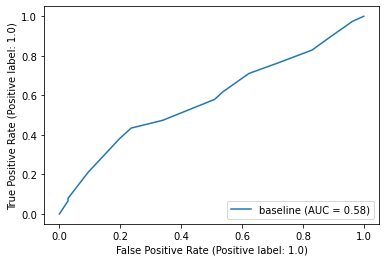

In [7]:
baseline = train.train_and_evalaute_classifier(X_train, X_test, y_train, y_test, balance_dataset='balanced' ,roc_auc_title= 'baseline') 

In [7]:
from src.training.evaluate import ModelPlots
evaluate = ModelPlots()


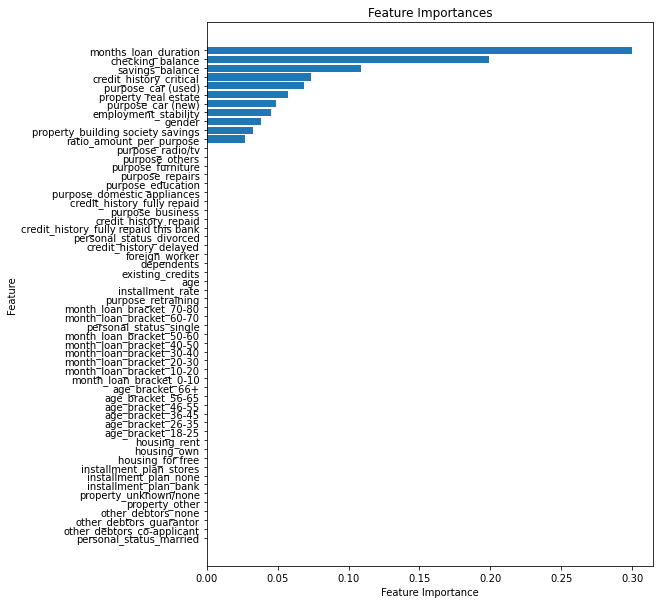

In [9]:
evaluate.plot_feature_importances(df_engineered, baseline)

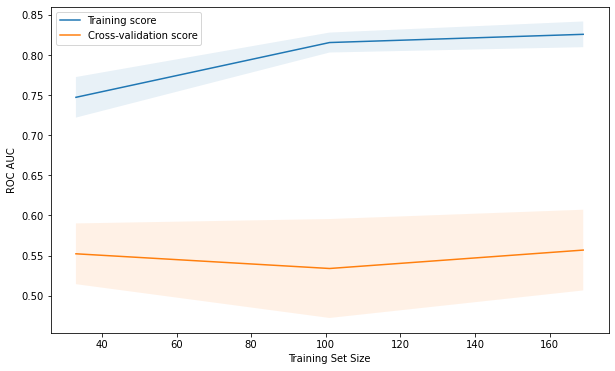

In [13]:
evaluate.plot_learning_curve(baseline, X_train, y_train, cv= 5, scoring='roc_auc')

In [15]:
baseline

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_impurity_decrease=0.001, min_samples_leaf=10,
                       min_samples_split=20, random_state=123)

In [8]:
import optuna
study = optuna.create_study(direction="maximize")


from src.training.parameter_tuning import OptimizationParameterFinder

optuna_tuning = OptimizationParameterFinder()

def func(trial):

    return optuna_tuning.optimization_objective(trial, X_train, y_train)

# Log the parameters used in the model

study.optimize(func, n_trials=5)

[I 2023-02-20 19:13:37,009] A new study created in memory with name: no-name-69288368-6e10-415b-8034-2025f083348e
[I 2023-02-20 19:13:37,828] Trial 0 finished with value: 0.13270975056689344 and parameters: {'n_estimators': 350, 'max_depth': 8, 'min_samples_split': 22, 'min_samples_leaf': 11, 'criterion': 'gini', 'min_impurity_decrease': 0.05097990121496957, 'max_samples': 0.8233531617265162, 'max_features': 0.7747671442270799, 'ccp_alpha': 1.5324453255538673e-10}. Best is trial 0 with value: 0.13270975056689344.


CV Scores: [0.66354875 0.         0.         0.         0.        ]


[I 2023-02-20 19:13:38,778] Trial 1 finished with value: 0.13877551020408166 and parameters: {'n_estimators': 568, 'max_depth': 3, 'min_samples_split': 36, 'min_samples_leaf': 7, 'criterion': 'gini', 'min_impurity_decrease': 0.011696439374332597, 'max_samples': 0.5507182023705459, 'max_features': 0.7112058682405779, 'ccp_alpha': 0.009339332921245093}. Best is trial 1 with value: 0.13877551020408166.


CV Scores: [0.69387755 0.         0.         0.         0.        ]


[I 2023-02-20 19:13:39,176] Trial 2 finished with value: 0.12335600907029479 and parameters: {'n_estimators': 217, 'max_depth': 6, 'min_samples_split': 28, 'min_samples_leaf': 10, 'criterion': 'gini', 'min_impurity_decrease': 0.06911640307041167, 'max_samples': 0.9251635574564196, 'max_features': 0.7906983318394626, 'ccp_alpha': 3.903600759013912e-06}. Best is trial 1 with value: 0.13877551020408166.


CV Scores: [0.61678005 0.         0.         0.         0.        ]


[I 2023-02-20 19:13:40,485] Trial 3 finished with value: 0.13219954648526078 and parameters: {'n_estimators': 933, 'max_depth': 4, 'min_samples_split': 37, 'min_samples_leaf': 28, 'criterion': 'entropy', 'min_impurity_decrease': 0.06958336944303255, 'max_samples': 0.5186749725457656, 'max_features': 0.760559550386724, 'ccp_alpha': 0.0007608135583635709}. Best is trial 1 with value: 0.13877551020408166.


CV Scores: [0.66099773 0.         0.         0.         0.        ]


[I 2023-02-20 19:13:41,842] Trial 4 finished with value: 0.1399092970521542 and parameters: {'n_estimators': 703, 'max_depth': 7, 'min_samples_split': 30, 'min_samples_leaf': 4, 'criterion': 'entropy', 'min_impurity_decrease': 0.04186607143217282, 'max_samples': 0.5587272389572129, 'max_features': 0.7035819917747952, 'ccp_alpha': 2.638010235395078e-05}. Best is trial 4 with value: 0.1399092970521542.


CV Scores: [0.69954649 0.         0.         0.         0.        ]


Train roc auc model final:
0.6882935964191103
Test roc auc model final:
0.5615690168818273


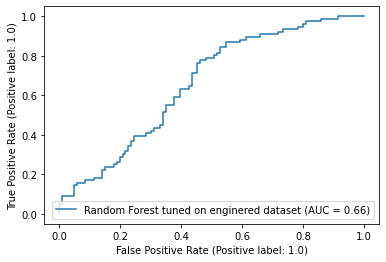

In [11]:
best_trial = study.best_trial

model_final = train.train_and_evalaute_classifier(X_train, X_test, y_train, y_test, 
'balanced', 'Random Forest tuned on enginered dataset', 
best_trial_params=best_trial.params,
model_name='RandomForest')

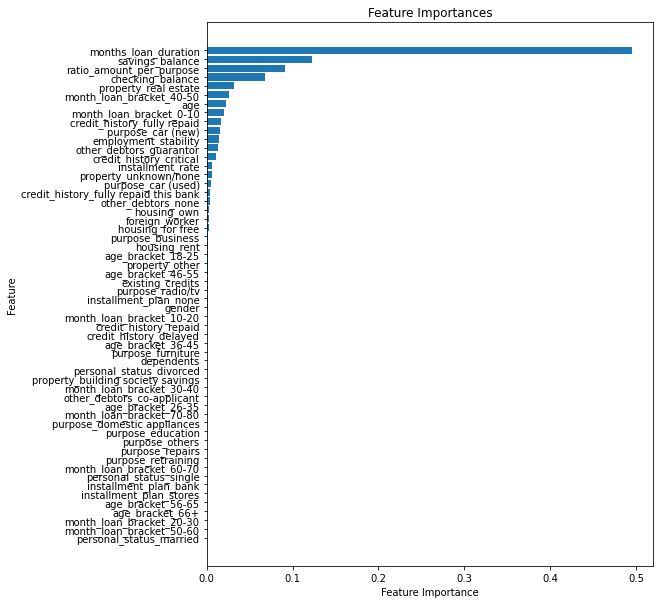

In [12]:
evaluate.plot_feature_importances(df_engineered, model_final)

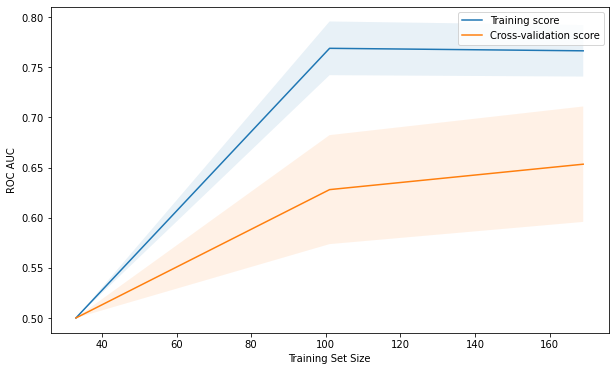

In [15]:
evaluate.plot_learning_curve(model_final, X_train, y_train, cv=5, scoring='roc_auc')

In [16]:
baseline.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [14]:
model_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 2.638010235395078e-05,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 0.7035819917747952,
 'max_leaf_nodes': None,
 'max_samples': 0.5587272389572129,
 'min_impurity_decrease': 0.04186607143217282,
 'min_samples_leaf': 4,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 703,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

### Conclusions

- The baseline model using default parameters and a max_depth of 5 is causing overfitting, as evidenced by the high training score (0.78) and lower test score (0.60) for the ROC AUC metric.

- The choice of evaluation metric, ROC AUC, is appropriate for this classification problem as it measures the model's ability to distinguish between classes at various threshold settings. However, it is important to note that this metric can be sensitive to imbalanced class problems, which is a potential issue for this dataset.

- The feature importance plot reveals that many variables do not contribute significantly to the model's predictive power. This suggests that some of the features may have been assigned high importance despite not being strong predictors.

- The hyperparameters tuned for the Random Forest model were adjusted to prevent overfitting, by increasing the range of max_depth, min_samples_split, and min_samples_leaf. Despite some remaining overfitting, the learning curve shows that the gap between training and cross-validation scores is narrower than for the baseline model.

- To further prevent overfitting in future iterations, additional regularization techniques could be explored. However, it is unclear whether the current model can achieve a better tradeoff between performance and overfitting without further changes to the data or modeling approach.

### Non-personal dataset

In [15]:
# Non personal dataset

X = df_non_personal.drop(columns=['default']).values
y = df_non_personal['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)


Train roc auc baseline:
0.7539736914223075
Test roc auc:
0.631082423038729


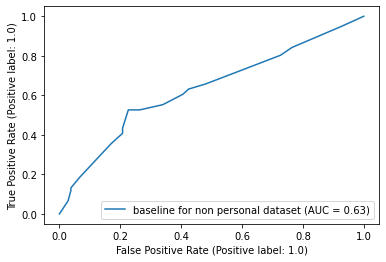

In [16]:
baseline = train.train_and_evalaute_classifier(X_train, X_test, y_train, y_test, balance_dataset='balanced' ,roc_auc_title= 'baseline for non personal dataset') 

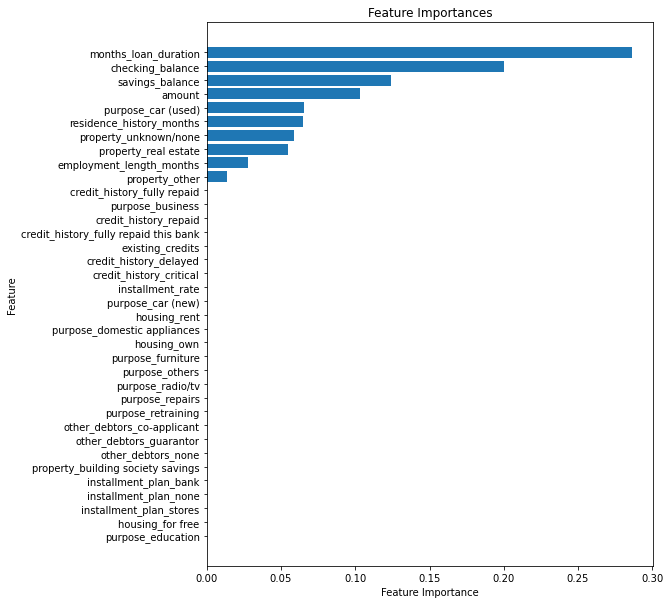

In [17]:
evaluate.plot_feature_importances(df_non_personal, baseline)

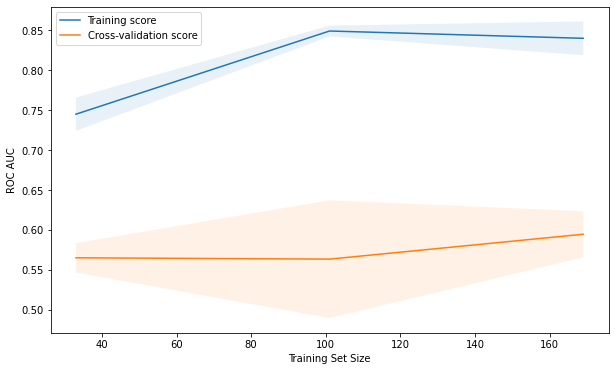

In [18]:
evaluate.plot_learning_curve(baseline, X_train, y_train, cv=5, scoring= 'roc_auc')

In [19]:
study.optimize(func, n_trials=5)

[I 2023-02-20 19:17:56,208] Trial 5 finished with value: 0.12908163265306122 and parameters: {'n_estimators': 997, 'max_depth': 6, 'min_samples_split': 36, 'min_samples_leaf': 39, 'criterion': 'gini', 'min_impurity_decrease': 0.07311827763727836, 'max_samples': 0.5940615638242666, 'max_features': 0.6478185664003618, 'ccp_alpha': 1.113918898794436e-06}. Best is trial 4 with value: 0.1399092970521542.


CV Scores: [0.64540816 0.         0.         0.         0.        ]


[I 2023-02-20 19:17:57,010] Trial 6 finished with value: 0.12029478458049887 and parameters: {'n_estimators': 576, 'max_depth': 7, 'min_samples_split': 24, 'min_samples_leaf': 9, 'criterion': 'gini', 'min_impurity_decrease': 0.08260870010326493, 'max_samples': 0.8636084141496034, 'max_features': 0.6962458500763948, 'ccp_alpha': 4.4009279400967483e-10}. Best is trial 4 with value: 0.1399092970521542.


CV Scores: [0.60147392 0.         0.         0.         0.        ]


[I 2023-02-20 19:17:58,112] Trial 7 finished with value: 0.1377551020408163 and parameters: {'n_estimators': 774, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 22, 'criterion': 'entropy', 'min_impurity_decrease': 0.03359864206764735, 'max_samples': 0.5604076554425688, 'max_features': 0.6292189133825368, 'ccp_alpha': 6.097002787968596e-06}. Best is trial 4 with value: 0.1399092970521542.


CV Scores: [0.68877551 0.         0.         0.         0.        ]


[I 2023-02-20 19:17:59,240] Trial 8 finished with value: 0.13344671201814057 and parameters: {'n_estimators': 744, 'max_depth': 8, 'min_samples_split': 30, 'min_samples_leaf': 32, 'criterion': 'entropy', 'min_impurity_decrease': 0.030430845352847694, 'max_samples': 0.5708761618217998, 'max_features': 0.6456104238539416, 'ccp_alpha': 0.004658688180073464}. Best is trial 4 with value: 0.1399092970521542.


CV Scores: [0.66723356 0.         0.         0.         0.        ]


[I 2023-02-20 19:18:00,464] Trial 9 finished with value: 0.1334467120181406 and parameters: {'n_estimators': 876, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 31, 'criterion': 'entropy', 'min_impurity_decrease': 0.05673621370728737, 'max_samples': 0.52785200975353, 'max_features': 0.7876704465668438, 'ccp_alpha': 3.5392281071039547e-09}. Best is trial 4 with value: 0.1399092970521542.


CV Scores: [0.66723356 0.         0.         0.         0.        ]


Train roc auc model final:
0.6834520873298621
Test roc auc model final:
0.5502730883813306


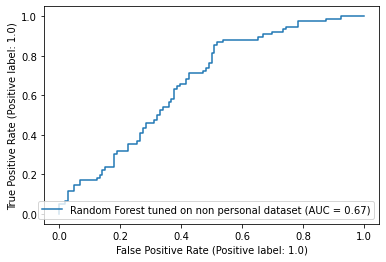

In [20]:
best_trial = study.best_trial

model_final_non_personal = train.train_and_evalaute_classifier(X_train, X_test, y_train, y_test, 
'balanced', 'Random Forest tuned on non personal dataset', 

best_trial_params=best_trial.params,
model_name='RandomForest')

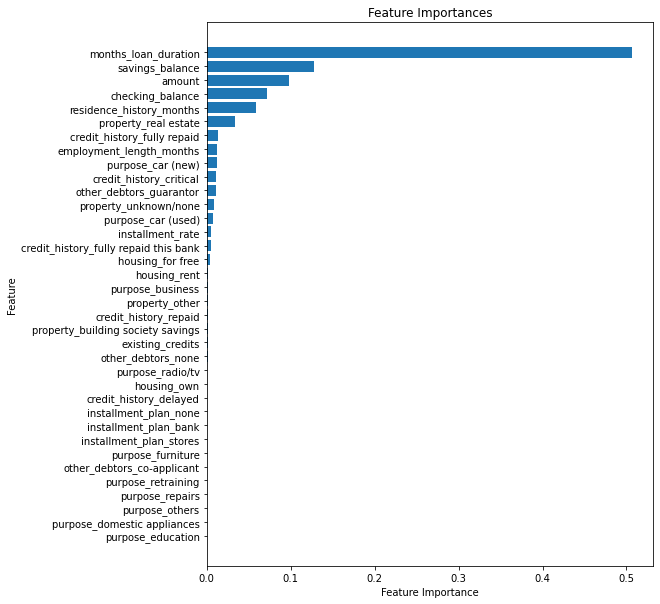

In [24]:
evaluate.plot_feature_importances(df_non_personal, model_final_non_personal)

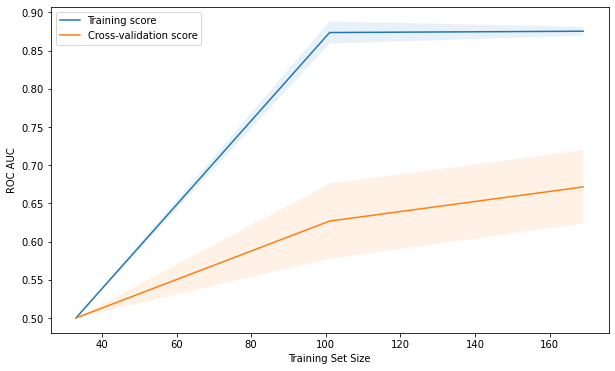

In [21]:
evaluate.plot_learning_curve(model_final_non_personal, X_train, y_train, cv= 5, scoring= 'roc_auc')

In [22]:
baseline.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [23]:
model_final_non_personal.get_params()

{'bootstrap': True,
 'ccp_alpha': 2.638010235395078e-05,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 0.7035819917747952,
 'max_leaf_nodes': None,
 'max_samples': 0.5587272389572129,
 'min_impurity_decrease': 0.04186607143217282,
 'min_samples_leaf': 4,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 703,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

### Conclusions

- Upon analyzing the performance of the baseline model for the dataset without personal features, we observe that it doesn't show any significant improvement in the training and testing scores, which are 0.76 and 0.64 respectively.

- We found that, for the dataset with personal features, gender was the only predictor that had any significant importance in predicting the likelihood of default. The plots of both datasets reveal that there are no strong predictors other than financial variables, such as purpose of loans, property type, and installment rate.

- The learning curve of the tuned random forest model indicates that there is a relatively low improvement in overfitting with a slightly shorter distance between the training and cross-validation scores.

- Despite our best efforts to address the overfitting issue by applying various regularization techniques in  parameter tuning, we did not find any significant improvement in the performance of the models, either for the dataset with non-personal features or with personal features. Therefore, we may need to explore other techniques and methods to improve the performance of the models in the future.